# SLR FINAL EXAM

### DATA DESCRIPTION: 

The New York City Department of Transportation collects daily data about the number of bicycles going over bridges in New York City. This data is used to measure bike utilization as a part of transportation planning. This dataset is a daily record of the number of bicycles crossing into or out of Manhattan via one of the East River bridges (that is, excluding Bronx thruways and the non-bikeable Hudson River tunnels) for a stretch of 9 months.

### ATTRIBUTES:


•	High Temp (°F)

•	Low Temp (°F)

•	Precipitation

•	Brooklyn Bridge

•	Manhattan Bridge

•	Williamsburg Bridge

•	Queensboro Bridge

•	Total




### 1.	 Read the dataset (tab, csv, xls, txt, inbuilt dataset) 

In [ ]:
## Kindly change the below cells from markdown to code and execute it 

In [75]:
import pandas as pd

import csv

with open("data_set.csv","r")as file:
    
    reader=csv.reader(file)

df=pd.read_csv("data_set.csv")

df.head()


,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,78.1,66.0,0.01,1704.0,3126.0,4115.0,2552.0,11497.0
1,55.0,48.9,0.15,827.0,1646.0,2565.0,1884.0,6922.0
2,39.9,34.0,0.09,526.0,1232.0,1695.0,1306.0,4759.0
3,44.1,33.1,0.47 (S),521.0,1067.0,1440.0,1307.0,4335.0
4,42.1,26.1,0,1416.0,2617.0,3081.0,2357.0,9471.0


In [221]:
# importing the needed libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [76]:
df.shape

(1374, 8)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374 entries, 0 to 1373
Data columns (total 8 columns):
High Temp (°F)         1373 non-null float64
Low Temp (°F)          1373 non-null float64
Precipitation          1373 non-null object
Brooklyn Bridge        1373 non-null float64
Manhattan Bridge       1373 non-null float64
Williamsburg Bridge    1373 non-null float64
Queensboro Bridge      1373 non-null float64
Total                  1373 non-null float64
dtypes: float64(7), object(1)
memory usage: 86.0+ KB


### 2.	Summarize important observations from the data set (5 Marks)

Some pointers which would help you, but don’t be limited by these

a.	What are the number of rows; no. & types of variables (continuous, categorical etc.)

b.	Calculate five point summary for numerical variables

c.	Summarize observations for categorical variables – no. of categories, % observations in each category


In [77]:
df.shape

(1374, 8)

In [12]:
# THE DATASET CONTAINS 1374 RECORDS AND 8 FEATURES WHICH ARE NOT NULL.

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374 entries, 0 to 1373
Data columns (total 8 columns):
High Temp (°F)         1373 non-null float64
Low Temp (°F)          1373 non-null float64
Precipitation          1373 non-null object
Brooklyn Bridge        1373 non-null float64
Manhattan Bridge       1373 non-null float64
Williamsburg Bridge    1373 non-null float64
Queensboro Bridge      1373 non-null float64
Total                  1373 non-null float64
dtypes: float64(7), object(1)
memory usage: 86.0+ KB


In [79]:
df.columns

Index(['High Temp (°F)', 'Low Temp (°F)', 'Precipitation', 'Brooklyn Bridge',
       'Manhattan Bridge', 'Williamsburg Bridge', 'Queensboro Bridge',
       'Total'],
      dtype='object')

In [23]:
df.dtypes

High Temp (°F)         float64
Low Temp (°F)          float64
Precipitation           object
Brooklyn Bridge        float64
Manhattan Bridge       float64
Williamsburg Bridge    float64
Queensboro Bridge      float64
Total                  float64
dtype: object

In [80]:
# 2c 
print('% value in each columns')
for k in df:
    print('/n% values in column :',k)
    print(df[k].value_counts()/len(df[k]*100))

% value in each columns
/n% values in column : High Temp (°F)
57.0     0.020378
62.1     0.015284
78.1     0.010917
68.0     0.010917
71.1     0.010917
64.0     0.010189
73.9     0.005822
66.0     0.005822
70.0     0.005822
81.0     0.005822
44.1     0.005095
57.9     0.005095
48.9     0.005095
55.0     0.005095
39.9     0.005095
46.9     0.005095
66.9     0.005095
60.1     0.005095
42.1     0.005095
45.0     0.005095
43.0     0.005095
125.7    0.000728
211.9    0.000728
134.6    0.000728
173.7    0.000728
215.4    0.000728
91.7     0.000728
141.6    0.000728
178.3    0.000728
189.6    0.000728
           ...   
72.1     0.000728
207.4    0.000728
69.1     0.000728
193.3    0.000728
118.3    0.000728
76.1     0.000728
122.8    0.000728
80.1     0.000728
77.6     0.000728
167.9    0.000728
82.1     0.000728
100.4    0.000728
154.3    0.000728
109.2    0.000728
159.9    0.000728
193.1    0.000728
214.6    0.000728
104.3    0.000728
80.2     0.000728
186.3    0.000728
199.1    0.000728
20

### 3.	Check for defects in the data. Perform necessary actions to ‘fix’ these defects (5 Marks)

Some pointers which would help you, but don’t be limited by these

a.	Do variables have missing/null values?

b.	Do variables have outliers?

c.	Is the data normally distributed? Is it a defect? Why or why not? 


In [81]:
df.isnull().sum()

High Temp (°F)         1
Low Temp (°F)          1
Precipitation          1
Brooklyn Bridge        1
Manhattan Bridge       1
Williamsburg Bridge    1
Queensboro Bridge      1
Total                  1
dtype: int64

In [82]:
df['High Temp (°F)'] = df['High Temp (°F)'].fillna(df['High Temp (°F)'].mean())
df['Low Temp (°F)'] = df['Low Temp (°F)'].fillna(df['Low Temp (°F)'].mean())
df['Brooklyn Bridge'] = df['Brooklyn Bridge'].fillna(df['Brooklyn Bridge'].mean())
df['Manhattan Bridge'] = df['Manhattan Bridge'].fillna(df['Manhattan Bridge'].mean())
df['Williamsburg Bridge'] = df['Williamsburg Bridge'].fillna(df['Williamsburg Bridge'].mean())
df['Queensboro Bridge'] = df['Queensboro Bridge'].fillna(df['Queensboro Bridge'].mean())
df['Total'] = df['Total'].fillna(df['Total'].mean())

In [28]:
df.isnull().sum()

High Temp (°F)         0
Low Temp (°F)          0
Precipitation          1
Brooklyn Bridge        0
Manhattan Bridge       0
Williamsburg Bridge    0
Queensboro Bridge      0
Total                  0
dtype: int64

In [83]:
# now we remove the only one value present in the precipitation column
df.dropna(inplace=True)

In [84]:
df.isnull().sum()

High Temp (°F)         0
Low Temp (°F)          0
Precipitation          0
Brooklyn Bridge        0
Manhattan Bridge       0
Williamsburg Bridge    0
Queensboro Bridge      0
Total                  0
dtype: int64

In [86]:
prep = df['Precipitation'].replace(['0.47 (S)'],'0.47')
prep = prep.replace(['T'],'0')
prep = prep.astype(float)
df['Precipitation'] = prep
df.head()

,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,78.1,66.0,0.01,1704.0,3126.0,4115.0,2552.0,11497.0
1,55.0,48.9,0.15,827.0,1646.0,2565.0,1884.0,6922.0
2,39.9,34.0,0.09,526.0,1232.0,1695.0,1306.0,4759.0
3,44.1,33.1,0.47,521.0,1067.0,1440.0,1307.0,4335.0
4,42.1,26.1,0.00,1416.0,2617.0,3081.0,2357.0,9471.0


In [87]:
df.dtypes

High Temp (°F)         float64
Low Temp (°F)          float64
Precipitation          float64
Brooklyn Bridge        float64
Manhattan Bridge       float64
Williamsburg Bridge    float64
Queensboro Bridge      float64
Total                  float64
dtype: object

In [88]:
df.duplicated().value_counts()

False    1203
True      170
dtype: int64

In [66]:
df.duplicated().any()

True

In [36]:
df.dtypes

High Temp (°F)         float64
Low Temp (°F)          float64
Precipitation          float64
Brooklyn Bridge        float64
Manhattan Bridge       float64
Williamsburg Bridge    float64
Queensboro Bridge      float64
Total                  float64
dtype: object

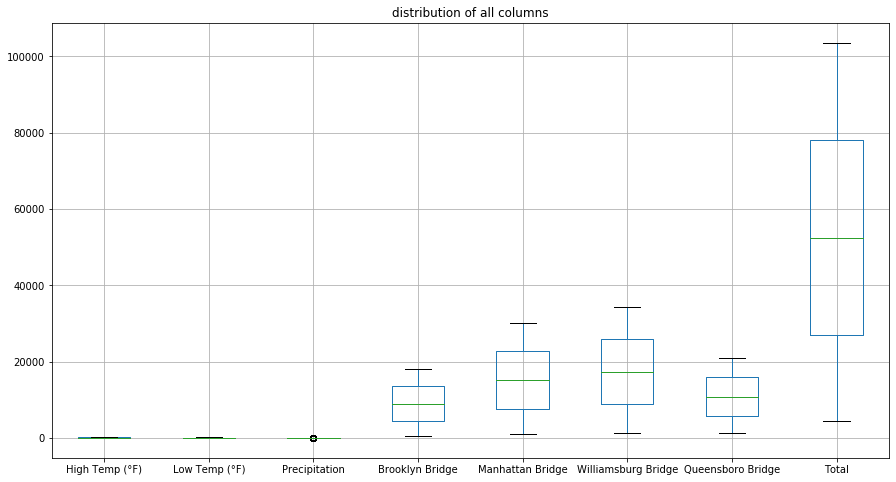

In [89]:
# OUTLIERS DETECTION
plt.figure(figsize=(15,8))

df.boxplot()
plt.title('distribution of all columns')
plt.show()

In [48]:
# YES THE VARIABLE DO CONATIN OUTLIERS

In [90]:
q1 = df.quantile(0.25)
q2 = df.quantile(0.5)
q3 = df.quantile(0.75)
iqr = q3-q1
iqr

High Temp (°F)            90.8
Low Temp (°F)             54.5
Precipitation              0.4
Brooklyn Bridge         9047.0
Manhattan Bridge       15021.0
Williamsburg Bridge    16863.0
Queensboro Bridge      10115.0
Total                  51045.0
dtype: float64

In [43]:
df = df[~((df <(q1 - 1.5*iqr))| (df>(q3 + 1.5*iqr))).any(axis=1)]


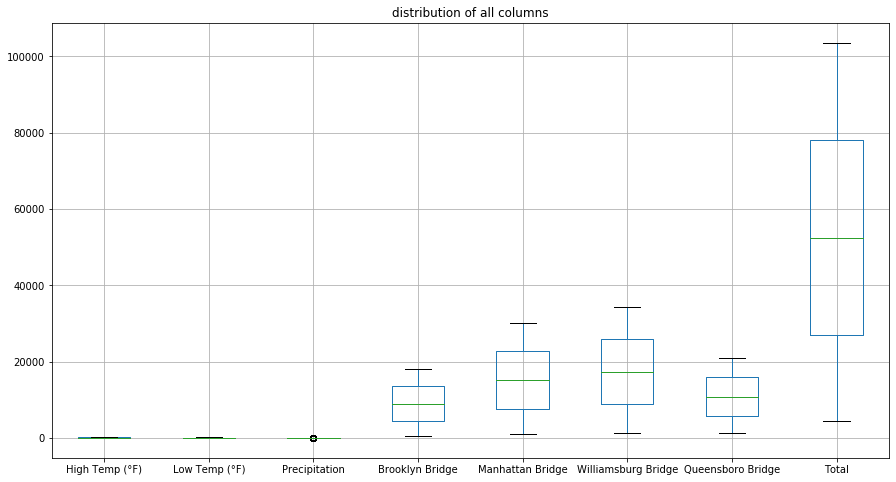

In [91]:
plt.figure(figsize=(15,8))

df.boxplot()
plt.title('distribution of all columns')
plt.show()

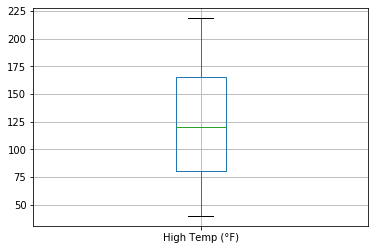

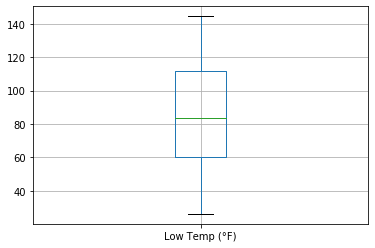

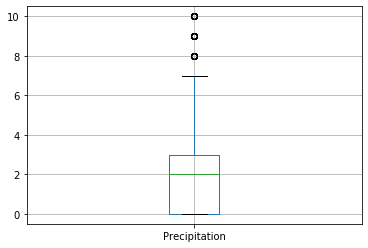

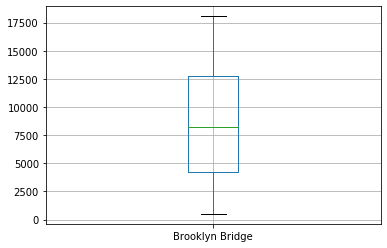

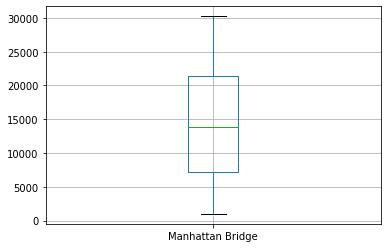

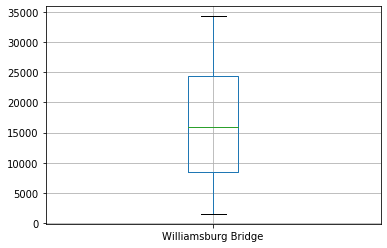

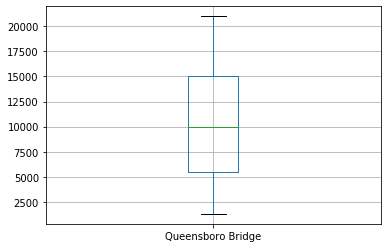

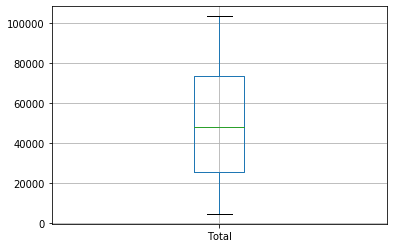

In [59]:
for column in df:
    plt.figure()
    df.boxplot([column])
    plt.show()

In [92]:
# Normality checking
df.skew()

High Temp (°F)         0.079675
Low Temp (°F)          0.051025
Precipitation          2.522434
Brooklyn Bridge        0.083181
Manhattan Bridge       0.082094
Williamsburg Bridge    0.084542
Queensboro Bridge      0.084426
Total                  0.083823
dtype: float64

In [52]:
df.cov()

,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
High Temp (°F),2.415032e+03,1503.172289,37.590229,2.398021e+05,3.978328e+05,4.470270e+05,2.679168e+05,1.352579e+06
Low Temp (°F),1.503172e+03,940.377598,24.172385,1.490243e+05,2.472782e+05,2.779339e+05,1.665220e+05,8.407583e+05
Precipitation,3.759023e+01,24.172385,5.557570,3.687922e+03,6.115291e+03,6.894729e+03,4.126879e+03,2.082478e+04
Brooklyn Bridge,2.398021e+05,149024.315847,3687.922074,2.390526e+07,3.966026e+07,4.455116e+07,2.670715e+07,1.348238e+08
Manhattan Bridge,3.978328e+05,247278.210215,6115.290916,3.966026e+07,6.581562e+07,7.392752e+07,4.431718e+07,2.237206e+08
Williamsburg Bridge,4.470270e+05,277933.934457,6894.729045,4.455116e+07,7.392752e+07,8.304928e+07,4.978361e+07,2.513115e+08
Queensboro Bridge,2.679168e+05,166521.971795,4126.879156,2.670715e+07,4.431718e+07,4.978361e+07,2.984703e+07,1.506550e+08
Total,1.352579e+06,840758.331839,20824.783042,1.348238e+08,2.237206e+08,2.513115e+08,1.506550e+08,7.605108e+08


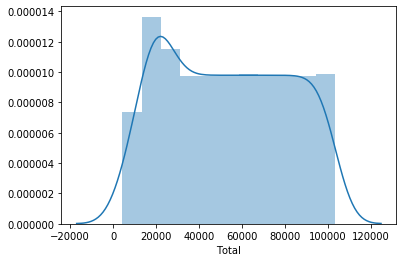

In [93]:
sns.distplot(df['Total'])
plt.show()

In [94]:
df.isnull().sum()

High Temp (°F)         0
Low Temp (°F)          0
Precipitation          0
Brooklyn Bridge        0
Manhattan Bridge       0
Williamsburg Bridge    0
Queensboro Bridge      0
Total                  0
dtype: int64

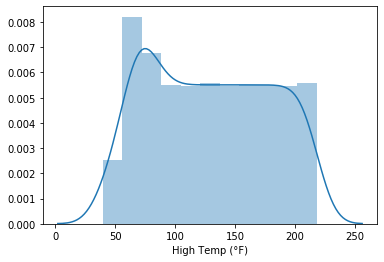

In [95]:
sns.distplot(df['High Temp (°F)'])
plt.show()

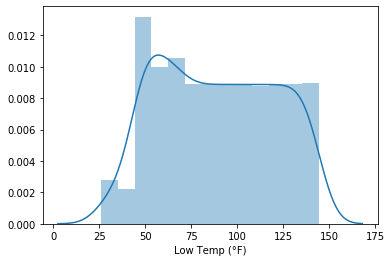

In [96]:
sns.distplot(df['Low Temp (°F)'])
plt.show()

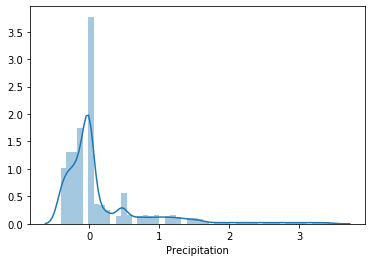

In [97]:
sns.distplot(df['Precipitation'])
plt.show()

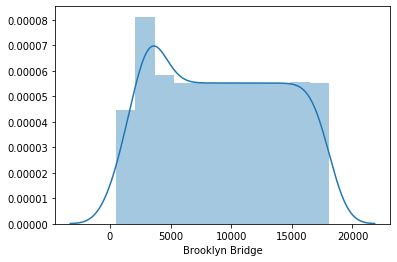

In [98]:
sns.distplot(df['Brooklyn Bridge'])
plt.show()

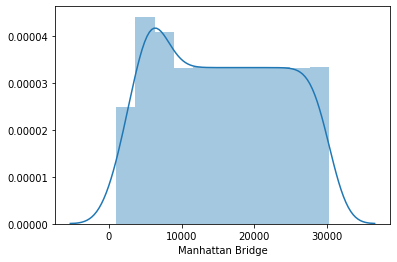

In [99]:
sns.distplot(df['Manhattan Bridge'])
plt.show()

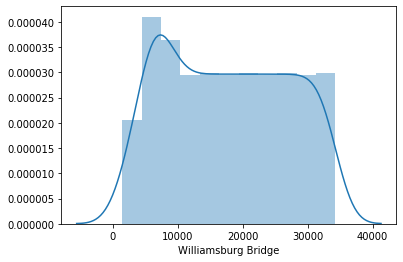

In [100]:
sns.distplot(df['Williamsburg Bridge'])
plt.show()

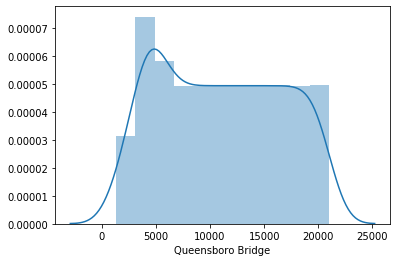

In [101]:
sns.distplot(df['Queensboro Bridge'])
plt.show()

INFERENCES : THE DATA IS NOT NROMALLY DISTRIBUTED , IT CAN BE TAKEN AS A DEFECT IN MODEL BUIDING WHICG CAN BE TRANSFORMED LATER USING THE TRANSFORMATION TECHNIQUES SUCH AS SQAUREROOT , LOG, RECIPROCAL OR BOXCOX.

### 4.	Summarize relationships among variables (10 marks)  

a.	Plot correlation plots. Which are the variables most correlated with Target? Which independent variables are correlated among themselves? Do you want to exclude some variables from the model based on this analysis? What other actions will you take?

b.	Plot all independent variables with the target. Are all relationships linear? If not, what steps would you take based on this information?

 Hint: based on your observations you may want to transform features or create additional features.


In [103]:
df.corr()

,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
High Temp (°F),1.000000,0.997684,0.149291,0.998226,0.998046,0.998397,0.998149,0.998247
Low Temp (°F),0.997684,1.000000,0.149471,0.994274,0.994200,0.994910,0.994372,0.994515
Precipitation,0.149291,0.149471,1.000000,0.148411,0.148298,0.148561,0.148433,0.148436
Brooklyn Bridge,0.998226,0.994274,0.148411,1.000000,0.999891,0.999887,0.999866,0.999938
Manhattan Bridge,0.998046,0.994200,0.148298,0.999891,1.000000,0.999930,0.999908,0.999973
Williamsburg Bridge,0.998397,0.994910,0.148561,0.999887,0.999930,1.000000,0.999935,0.999980
Queensboro Bridge,0.998149,0.994372,0.148433,0.999866,0.999908,0.999935,1.000000,0.999961
Total,0.998247,0.994515,0.148436,0.999938,0.999973,0.999980,0.999961,1.000000


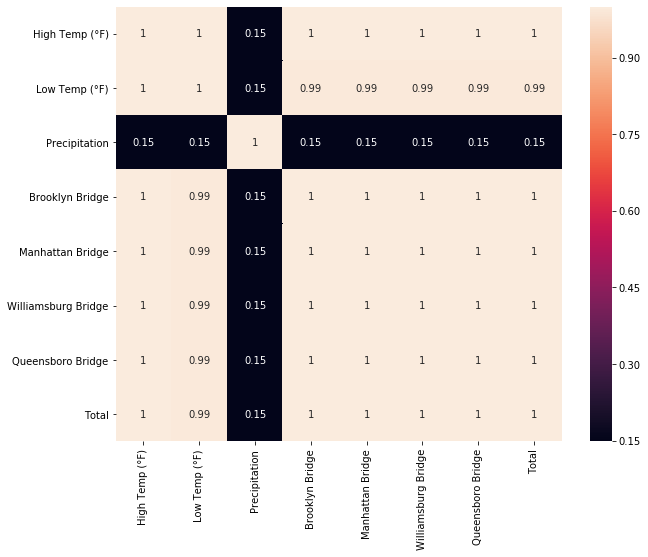

In [104]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot = True)
plt.show()

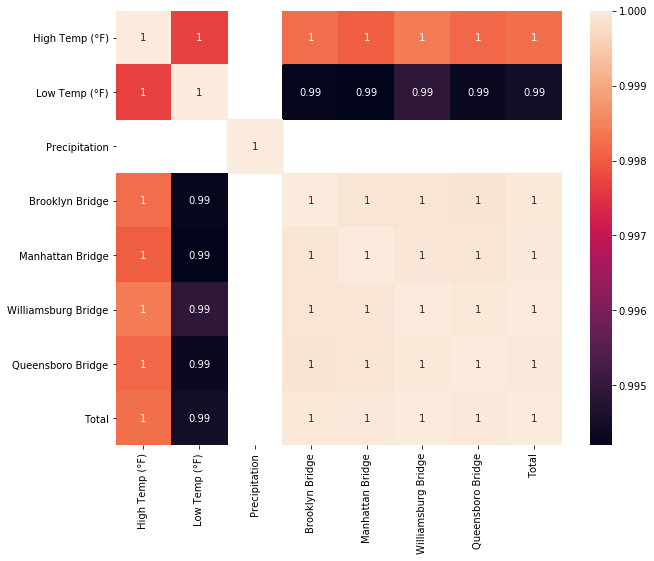

In [153]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr()[np.abs(round(df.corr() > 0.8))],annot=True)


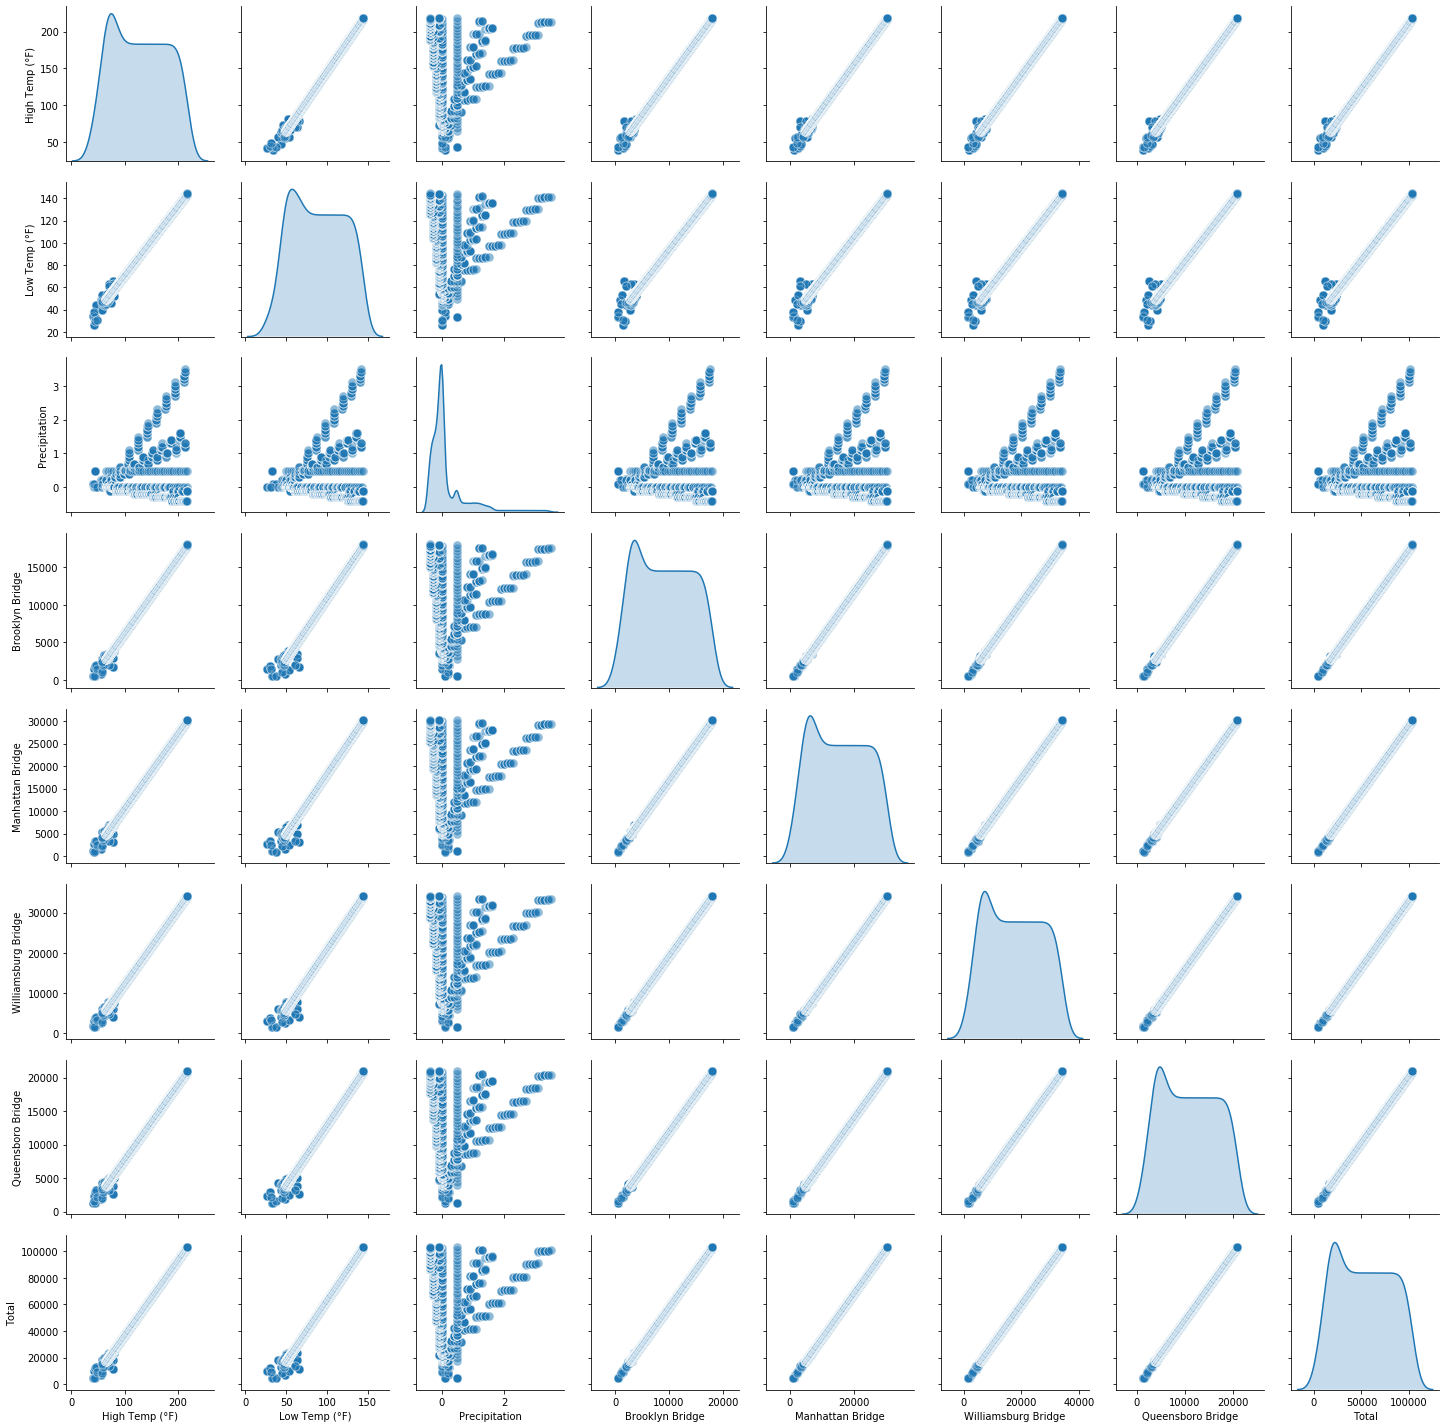

In [117]:
sns.pairplot(df,diag_kind='kde',plot_kws={'alpha':0.5,'s' : 80})
plt.show()

In [247]:
# ALL RELATIONSHIPS ARE HAVING SOME LINEAR RELATIONSHIP EXCEPT THE PRECIPITATAION COLUMN

### 5.	Split dataset into train and test (70:30) (5 marks)

a.	Are both train and test representative of the overall data? How would you ascertain this statistically?


In [121]:
df.columns

Index(['High Temp (°F)', 'Low Temp (°F)', 'Precipitation', 'Brooklyn Bridge',
       'Manhattan Bridge', 'Williamsburg Bridge', 'Queensboro Bridge',
       'Total'],
      dtype='object')

In [124]:
# SCALING THE DATA

In [123]:
ss = StandardScaler()
df[['High Temp (°F)', 'Low Temp (°F)', 'Precipitation', 'Brooklyn Bridge','Manhattan Bridge', 'Williamsburg Bridge', 'Queensboro Bridge','Total']] = ss.fit_transform(df[['High Temp (°F)', 'Low Temp (°F)', 'Precipitation', 'Brooklyn Bridge','Manhattan Bridge', 'Williamsburg Bridge', 'Queensboro Bridge','Total']])
df.head()

,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,-1.015420,-0.735886,-0.244448,-1.480823,-1.477376,-1.447137,-1.509266,-1.474366
1,-1.473642,-1.280629,-0.030799,-1.655146,-1.654601,-1.612512,-1.628098,-1.635600
2,-1.773172,-1.755288,-0.122363,-1.714977,-1.704176,-1.705336,-1.730920,-1.711829
3,-1.689859,-1.783959,0.457542,-1.715971,-1.723935,-1.732543,-1.730742,-1.726772
4,-1.729532,-2.006953,-0.259709,-1.538069,-1.538327,-1.557458,-1.543955,-1.545767


In [125]:
df1 = df.copy()

In [248]:
X = df1.drop('Total',axis=1)
y = df1.drop(['High Temp (°F)', 'Low Temp (°F)', 'Precipitation', 'Brooklyn Bridge','Manhattan Bridge', 'Williamsburg Bridge', 'Queensboro Bridge'],axis=1)

In [131]:
X1 = sm.add_constant(X)
X1.head()

,const,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge
0,1.0,-1.015420,-0.735886,-0.244448,-1.480823,-1.477376,-1.447137,-1.509266
1,1.0,-1.473642,-1.280629,-0.030799,-1.655146,-1.654601,-1.612512,-1.628098
2,1.0,-1.773172,-1.755288,-0.122363,-1.714977,-1.704176,-1.705336,-1.730920
3,1.0,-1.689859,-1.783959,0.457542,-1.715971,-1.723935,-1.732543,-1.730742
4,1.0,-1.729532,-2.006953,-0.259709,-1.538069,-1.538327,-1.557458,-1.543955


In [249]:
y.head()

,Total
0,-1.474366
1,-1.635600
2,-1.711829
3,-1.726772
4,-1.545767


In [250]:
X_train,X_test,y_train,y_test = train_test_split(X1,y,test_size=0.3,random_state=10)
print("The shape of X train is :", X_train.shape)
print("The shape of X test is :", X_test.shape)
print("The shape of Y train is :", y_train.shape)
print("The shape of Y test is :", y_test.shape)

The shape of X train is : (961, 8)
The shape of X test is : (412, 8)
The shape of Y train is : (961, 1)
The shape of Y test is : (412, 1)


### 6.	Fit a base model. Please write your key observations (15 marks) 

a.	What is the overall R2? Please comment on whether it is good or not.

b.	What is the adjusted R2? Is it different from R2? Why?

c.	Which variables are significant?

d.	Is there multicollinearity?

e.	Which other key model output parameters do you want to look at? 


In [251]:
model_base = sm.OLS(y,X1).fit()
model_base.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.538e+11
Date:                Sun, 04 Sep 2022   Prob (F-statistic):               0.00
Time:                        07:10:07   Log-Likelihood:                 12858.
No. Observations:                1373   AIC:                        -2.570e+04
Df Residuals:                    1365   BIC:                        -2.566e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.721e-17   5.61e-07   4.85e-11      1.000    -1.1e-06     1.1e-06
High Temp (°F)      -5.545e-08   1.64e-05     -0.003      0.997   -3.23e-05    3.22e-05
Low Temp (°F)       -8.011e-08   1.02e-05     -0.008      0.994   -2.01e-05    1.99e-05
Precipitation       -1.315e-07   5.67e-07     -0.232      0.817   -1.24e-06    9.82e-07
Brooklyn Bridge         0.1773   4.45e-05   3981.804      0.000       0.177       0.177
Manhattan Bridge        0.2943   5.95e-05   4944.312      0.000       0.294       0.294
Williamsburg Bridge     0.3303   8.06e-05   4098.459      0.000       0.330       0.330
Queensboro Bridge       0.1981   5.49e-05   3606.164      0.000       0.198       0.198
==============================================================================
Omnibus:                        1.890   Durbin-Watson:                   2.215
Prob(Omnibus):                  0.389   Jarque-Bera (JB):                1.902
Skew:                           0.004   Prob(JB):                        0.386
Kurtosis:                       3.182   Cond. No.                         412.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [279]:
# R SQUARED 
model_base.rsquared

0.9999999995703408

##### THE R SQUARE VALUE IS NEAR TO 1 WHICH INDICATES THAT IT IS A FAIRLY GOOD MODEL.
##### NEARLY 99.99 % OF THE VARIANCE CAN BE EXPLAINED BY THE INDEPENDENT FEATURES IN THE DEPENDENT FEATURES

In [135]:
# ADJUSTED R SQUARE
model_base.rsquared_adj

0.9999999995681375

##### WE PREFER ADJUSTED R2 VALUE SINCE R2 ASSUMES THAT THE ALL INDEPENDENT VARIABLES AFFECT THE DEP (TARGET ) EVEN IF THEY ARE INSIGNIFICANT
##### EVEN WHEN WE KEEP ON ADDING THE INSIGNIFICANT INDEPENDENT VARIABLES THE R2 SQUARE INCREASES , wherein the adjusted r2 square will only increase if a significant varaiable is added

In [165]:
# SIGNIFICANT VARIABLES 
model_base.pvalues[model_base.pvalues > 0.05].index

Index(['const', 'High Temp (°F)', 'Low Temp (°F)', 'Precipitation'], dtype='object')

In [164]:
model_base.pvalues

const                  1.000000
High Temp (°F)         0.997308
Low Temp (°F)          0.993738
Precipitation          0.816814
Brooklyn Bridge        0.000000
Manhattan Bridge       0.000000
Williamsburg Bridge    0.000000
Queensboro Bridge      0.000000
dtype: float64

In [166]:
# THE ABOVE MENTIONED ARE THE SIGNIFICANT VARAIBLES WITH A P VALUE > 0.05 (LEVEL OF SIGNIFICANCE)
# 'Brooklyn Bridge', 'Manhattan Bridge', 'Williamsburg Bridge','Queensboro Bridge' ARE THE MOST INSIGNIFICANT VARAIBLES
# 'High Temp (°F)', 'Low Temp (°F)', 'Precipitation' are the most significant

In [142]:
# MULTICOLLINEARITY 
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['Feature'] = X.columns
print(vif)

            VIF              Feature
0    857.977477       High Temp (°F)
1    330.826236        Low Temp (°F)
2      1.023138        Precipitation
3   6298.861350      Brooklyn Bridge
4  11256.489139     Manhattan Bridge
5  20636.113211  Williamsburg Bridge
6   9587.972613    Queensboro Bridge


In [143]:
# YES THERE IS MULTICOLLINEARITY PRESENT IN THE DATA SINCE VIF > 10 FOR ALL COLUMNS EXCEPT THE PRECIPITATION COLUMN

In [144]:
# THE CONDITION NUMBER FROM THE BASE MODEL IS 412 WHICH INDICATES MODERATE MULTICOLLINEARITY

In [146]:
df2 = df1.drop('Total',axis=1)
df2.head()

,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge
0,-1.015420,-0.735886,-0.244448,-1.480823,-1.477376,-1.447137,-1.509266
1,-1.473642,-1.280629,-0.030799,-1.655146,-1.654601,-1.612512,-1.628098
2,-1.773172,-1.755288,-0.122363,-1.714977,-1.704176,-1.705336,-1.730920
3,-1.689859,-1.783959,0.457542,-1.715971,-1.723935,-1.732543,-1.730742
4,-1.729532,-2.006953,-0.259709,-1.538069,-1.538327,-1.557458,-1.543955


In [155]:
df.head()

,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,-1.015420,-0.735886,-0.244448,-1.480823,-1.477376,-1.447137,-1.509266,-1.474366
1,-1.473642,-1.280629,-0.030799,-1.655146,-1.654601,-1.612512,-1.628098,-1.635600
2,-1.773172,-1.755288,-0.122363,-1.714977,-1.704176,-1.705336,-1.730920,-1.711829
3,-1.689859,-1.783959,0.457542,-1.715971,-1.723935,-1.732543,-1.730742,-1.726772
4,-1.729532,-2.006953,-0.259709,-1.538069,-1.538327,-1.557458,-1.543955,-1.545767


In [151]:
df_num_vif = df2.select_dtypes(include=[np.number])
for i in range(len(df_num_vif.columns)):
    vif2 = pd.DataFrame()
    vif2['VIF'] = [variance_inflation_factor(df_num_vif.values,i) for i in range(df_num_vif.shape[1])]
    vif2['Feature'] = df_num_vif.columns
    multi = vif2[vif2['VIF']> 10]
    
    if (multi.empty == False):
        df_sorted = multi.sort_values(by='VIF',ascending = False)
    else :
        print(vif2)
        break
    if(df_sorted.empty==False):
        df_num_vif = df_num_vif.drop(df_sorted.Feature.iloc[0],axis=1)
    else :
        print(vif)
    

        VIF            Feature
0  1.022529      Precipitation
1  1.022529  Queensboro Bridge


In [158]:
vif_3 = pd.DataFrame()
vif_3['VIF'] = [variance_inflation_factor(df2.values,i) for i in range(df2.shape[1])]
vif_3['Feature'] = df2.columns
print(vif_3.sort_values(by='VIF'))

            VIF              Feature
2      1.023138        Precipitation
1    330.826236        Low Temp (°F)
0    857.977477       High Temp (°F)
3   6298.861350      Brooklyn Bridge
6   9587.972613    Queensboro Bridge
4  11256.489139     Manhattan Bridge
5  20636.113211  Williamsburg Bridge


In [ ]:
# from vif method the only two factors are the ['Precipitation ' and 'Low Temp (°F)']

In [159]:
df2.columns

Index(['High Temp (°F)', 'Low Temp (°F)', 'Precipitation', 'Brooklyn Bridge',
       'Manhattan Bridge', 'Williamsburg Bridge', 'Queensboro Bridge'],
      dtype='object')

In [260]:
# building a model with only the two varaibles 
X_vif = df2.drop(['Low Temp (°F)', 'Precipitation'],axis=1)
X_vif = sm.add_constant(X_vif)
X_train_vif,X_test_vif,y_train_vif,y_test_vif = train_test_split(X_vif,y,test_size=0.3,random_state=10)
print("The shape of X train is :", X_train.shape)
print("The shape of X test is :", X_test.shape)
print("The shape of Y train is :", y_train.shape)
print("The shape of Y test is :", y_test.shape)

The shape of X train is : (961, 8)
The shape of X test is : (412, 8)
The shape of Y train is : (961, 1)
The shape of Y test is : (412, 1)


In [261]:
model_base_vif = sm.OLS(y,X_vif).fit()
model_base_vif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.363e+11
Date:                Sun, 04 Sep 2022   Prob (F-statistic):               0.00
Time:                        07:14:05   Log-Likelihood:                 12858.
No. Observations:                1373   AIC:                        -2.570e+04
Df Residuals:                    1367   BIC:                        -2.567e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.721e-17   5.61e-07   4.85e-11      1.000    -1.1e-06     1.1e-06
High Temp (°F)      -1.718e-07   1.12e-05     -0.015      0.988   -2.22e-05    2.19e-05
Brooklyn Bridge         0.1773    4.2e-05   4219.949      0.000       0.177       0.177
Manhattan Bridge        0.2943   5.84e-05   5038.876      0.000       0.294       0.294
Williamsburg Bridge     0.3303   7.22e-05   4577.405      0.000       0.330       0.330
Queensboro Bridge       0.1981   5.36e-05   3693.475      0.000       0.198       0.198
==============================================================================
Omnibus:                        1.908   Durbin-Watson:                   2.215
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.924
Skew:                           0.003   Prob(JB):                        0.382
Kurtosis:                       3.183   Cond. No.                         343.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [259]:
# e BASE MODEL FITTING DETAILS
y_pred = model_base.predict(X_train)
mse_train = mean_squared_error(y_train,y_pred)
rmse_train = round(np.sqrt(mse_train))

y_pred_test = model_base.predict(X_test)
mse_test = mean_squared_error(y_test,y_pred_test)
rmse_test = round(np.sqrt(mse_test))

if(rmse_train > rmse_test):
    print('Model Underfit by:',(rmse_train -rmse_test))
if(rmse_train < rmse_test):
    print('Model Overfit by:',(rmse_test -rmse_train))
else:
    print('Perfect Fit')

Perfect Fit


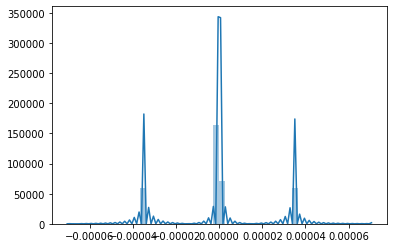

In [274]:
# 
sns.distplot(model_base.resid)

In [275]:
model_base.resid.skew()

0.0035337864515860708

In [277]:
from statsmodels.graphics.gofplots import qqplot

<Figure size 1080x576 with 0 Axes>

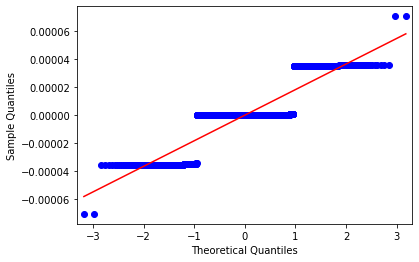

In [278]:
plt.figure(figsize=(15,8))
qqplot(model_base.resid,line='r')
plt.show()

### 7.	How do you improve the accuracy of the model? Write clearly the changes that you will make before re-fitting the model. Fit the final model. (20 marks)
Please feel free to have any number of iterations to get to the final answer. Marks are awarded based on the quality of final model you are able to achieve. 


In [167]:
# WE CONDUCT A RECURSSIVE FEATURE ELIMINATION TO SEE WHICH ARE THE BEST PARAMETERS

In [204]:
from sklearn.feature_selection import RFE

In [186]:
Xrfe = df1.drop('Total',axis=1)
yrfe = df1['Total']
Xrfe.columns

Index(['High Temp (°F)', 'Low Temp (°F)', 'Precipitation', 'Brooklyn Bridge',
       'Manhattan Bridge', 'Williamsburg Bridge', 'Queensboro Bridge'],
      dtype='object')

In [183]:
Xtrainrfe,Xtestrfe,ytrainrfe,ytestrfe = train_test_split(Xrfe,yrfe,test_size=0.3,random_state=10)


In [206]:
linreg = LinearRegression()
rfe_model = RFE(estimator=linreg,n_features_to_select=5)
rfe_model = rfe_model.fit(Xtrainrfe,ytrainrfe)
feat_index = pd.Series(data = rfe_model.ranking_,index = Xrfe.columns)
significant_features = feat_index[feat_index == 1].index
significant_features

Index(['Precipitation', 'Brooklyn Bridge', 'Manhattan Bridge',
       'Williamsburg Bridge', 'Queensboro Bridge'],
      dtype='object')

In [208]:
# RFE MODEL 
X_train.head()

,const,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge
106,1.0,-1.098733,-1.373012,-0.259709,-1.193994,-1.256683,-1.260210,-1.216633
73,1.0,-1.332803,-1.417611,-0.259709,-1.250843,-1.215969,-1.242818,-1.231220
554,1.0,-0.374703,-0.372724,-0.412315,-0.374255,-0.374630,-0.374651,-0.374846
1114,1.0,1.093193,1.089482,-0.717528,1.093879,1.093704,1.093988,1.094013
1221,1.0,1.374870,1.369818,-0.870135,1.374348,1.374270,1.374593,1.374727


In [211]:
rfe_X = X_train[['Precipitation', 'Brooklyn Bridge', 'Manhattan Bridge','Williamsburg Bridge', 'Queensboro Bridge']]
rfe_X_test = X_test[['Precipitation', 'Brooklyn Bridge', 'Manhattan Bridge','Williamsburg Bridge', 'Queensboro Bridge']]

In [212]:
linreg = LinearRegression()
linreg.fit(rfe_X,y_train)
linreg.score(rfe_X_test,y_test)

0.9999999995495491

In [189]:
# ALSO ESTABLISHING FORWARD FEATURE SELECTION 
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [194]:
linreg_forward = sfs(estimator=linreg,k_features='best',forward=True,verbose = 2,scoring='r2')
sfs_forward = linreg_forward.fit(Xtrainrfe,ytrainrfe)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2022-09-04 06:06:54] Features: 1/7 -- score: 0.9999662083476872[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2022-09-04 06:06:55] Features: 2/7 -- score: 0.9999874201599633[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished

[2022-09-04 06:06:55] Features: 3/7 -- score: 0.9999951869248077[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [195]:
sfs_forward.k_feature_names_

('Brooklyn Bridge',
 'Manhattan Bridge',
 'Williamsburg Bridge',
 'Queensboro Bridge')

In [192]:
sfs_forward.k_score_

0.9999999995739459

In [196]:
# Now with these colums 'Brooklyn Bridge','Manhattan Bridge','Williamsburg Bridge','Queensboro Bridge' we built a model and see the r2 score 

In [198]:
df1.head()

,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,-1.015420,-0.735886,-0.244448,-1.480823,-1.477376,-1.447137,-1.509266,-1.474366
1,-1.473642,-1.280629,-0.030799,-1.655146,-1.654601,-1.612512,-1.628098,-1.635600
2,-1.773172,-1.755288,-0.122363,-1.714977,-1.704176,-1.705336,-1.730920,-1.711829
3,-1.689859,-1.783959,0.457542,-1.715971,-1.723935,-1.732543,-1.730742,-1.726772
4,-1.729532,-2.006953,-0.259709,-1.538069,-1.538327,-1.557458,-1.543955,-1.545767


In [200]:
x_feature_selection = df1.drop(['Total',,axis=1)
y_feature_selection = df1['Total']

In [202]:
Xtrain_fs,Xtest_fc,ytrain_fs,ytest_fs = train_test_split(x_feature_selection,y_feature_selection,test_size=0.3,random_state=10)
model_base_feature_selection = sm.OLS(ytrain_fs,Xtrain_fs).fit()
model_base_feature_selection.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Total   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.241e+11
Date:                Sun, 04 Sep 2022   Prob (F-statistic):                        0.00
Time:                        06:16:22   Log-Likelihood:                          9016.9
No. Observations:                 961   AIC:                                 -1.802e+04
Df Residuals:                     954   BIC:                                 -1.799e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
High Temp (°F)       1.664e-07   1.93e-05      0.009      0.993   -3.76e-05     3.8e-05
Low Temp (°F)       -1.968e-07    1.2e-05     -0.016      0.987   -2.38e-05    2.34e-05
Precipitation        -3.69e-07   6.54e-07     -0.565      0.573   -1.65e-06    9.14e-07
Brooklyn Bridge         0.1773   5.13e-05   3455.326      0.000       0.177       0.177
Manhattan Bridge        0.2943   7.24e-05   4062.366      0.000       0.294       0.294
Williamsburg Bridge     0.3303   9.64e-05   3426.457      0.000       0.330       0.331
Queensboro Bridge       0.1981   6.51e-05   3045.461      0.000       0.198       0.198
==============================================================================
Omnibus:                        0.697   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.706   Jarque-Bera (JB):                0.567
Skew:                          -0.029   Prob(JB):                        0.753
Kurtosis:                       3.104   Cond. No.                         418.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [214]:
# USING CROSS VAL SCORE 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=LinearRegression(),X=X_train,y=y_train,cv=5,scoring='r2')

In [215]:
round(min(scores),4)

1.0

In [217]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(random_state=10)
linreg_with_SGD = sgd.fit(X_train,y_train)

In [219]:
y_pred = linreg_with_SGD.predict(X_train)

In [222]:
rmse_SGD = mean_squared_error(y_train,y_pred)
rmse_SGD

0.00045361412736673795

In [230]:
# HYPER PARAMETER TUNING 
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.model_selection import GridSearchCV

In [240]:
X = df1.drop('Total',axis=1)
y = df1['Total']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)


In [241]:
ridge = Ridge(alpha=1,max_iter=500)
ridge.fit(X_train,y_train)


Ridge(alpha=1, max_iter=500)

In [246]:
ridge=()
ridge_grid=GridSearchCV(estimator=ridge,param_grid=tuned_parameters,cv=2)
ridge_grid.fit(X_train,y_train)
ridge_grid.best_params_


TypeError: not enough arguments for format string

In [245]:
tuned_parameters = [{'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,0.1,1,5,10,20,30,40,50,60,70]}]


### 8.	Summarize as follows (10 marks) 

1.	Summarize the overall fit of the model and list down the measures to prove that it is a good model
2.	Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship. Feel free to use charts or graphs to explain.
3.	What changes from the base model had the most affect on model performance
4.	What are the key risks to your results and interpretation


In [263]:
# TRANSFORMING THE TARGET COLUMN TO SEE IF THEY CAN BE IN normal distribution
df1.head()

,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,-1.015420,-0.735886,-0.244448,-1.480823,-1.477376,-1.447137,-1.509266,-1.474366
1,-1.473642,-1.280629,-0.030799,-1.655146,-1.654601,-1.612512,-1.628098,-1.635600
2,-1.773172,-1.755288,-0.122363,-1.714977,-1.704176,-1.705336,-1.730920,-1.711829
3,-1.689859,-1.783959,0.457542,-1.715971,-1.723935,-1.732543,-1.730742,-1.726772
4,-1.729532,-2.006953,-0.259709,-1.538069,-1.538327,-1.557458,-1.543955,-1.545767


In [266]:
X = df1.drop('Total',axis=1)
X = sm.add_constant(X)
y = df['Total']

In [267]:
X_train,X_test,y_train,y_test = train_test_split(X1,y,test_size=0.3,random_state=10)
print("The shape of X train is :", X_train.shape)
print("The shape of X test is :", X_test.shape)
print("The shape of Y train is :", y_train.shape)
print("The shape of Y test is :", y_test.shape)

The shape of X train is : (961, 8)
The shape of X test is : (412, 8)
The shape of Y train is : (961,)
The shape of Y test is : (412,)


In [272]:
model_transform= sm.OLS(np.sqrt(y_train),X_train).fit()

In [273]:
model_transform.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 04 Sep 2022   Prob (F-statistic):                nan
Time:                        07:19:06   Log-Likelihood:                    nan
No. Observations:                 961   AIC:                               nan
Df Residuals:                     953   BIC:                               nan
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                      nan        nan        nan        nan         nan         nan
High Temp (°F)             nan        nan        nan        nan         nan         nan
Low Temp (°F)              nan        nan        nan        nan         nan         nan
Precipitation              nan        nan        nan        nan         nan         nan
Brooklyn Bridge            nan        nan        nan        nan         nan         nan
Manhattan Bridge           nan        nan        nan        nan         nan         nan
Williamsburg Bridge        nan        nan        nan        nan         nan         nan
Queensboro Bridge          nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                         418.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [281]:
# WE CAN CONCLUDE THAT THE RFE MODEL HAS GIVEN THE MOST R2 SCORE


In [284]:
# THE VARIABLE Precipitation', 'Brooklyn Bridge','Manhattan Bridge', 'Williamsburg Bridge', 'Queensboro Bridge' are mostly correlated with the target

In [285]:
# the key risk is the precipiation column .which is offering lots of different values calculated for the totalmbicycles driven

In [ ]:
# the total number of bicycles ridden is mostly affected by the temp min and max according to precipiatations asp]

In [282]:
df1.columns

Index(['High Temp (°F)', 'Low Temp (°F)', 'Precipitation', 'Brooklyn Bridge',
       'Manhattan Bridge', 'Williamsburg Bridge', 'Queensboro Bridge',
       'Total'],
      dtype='object')

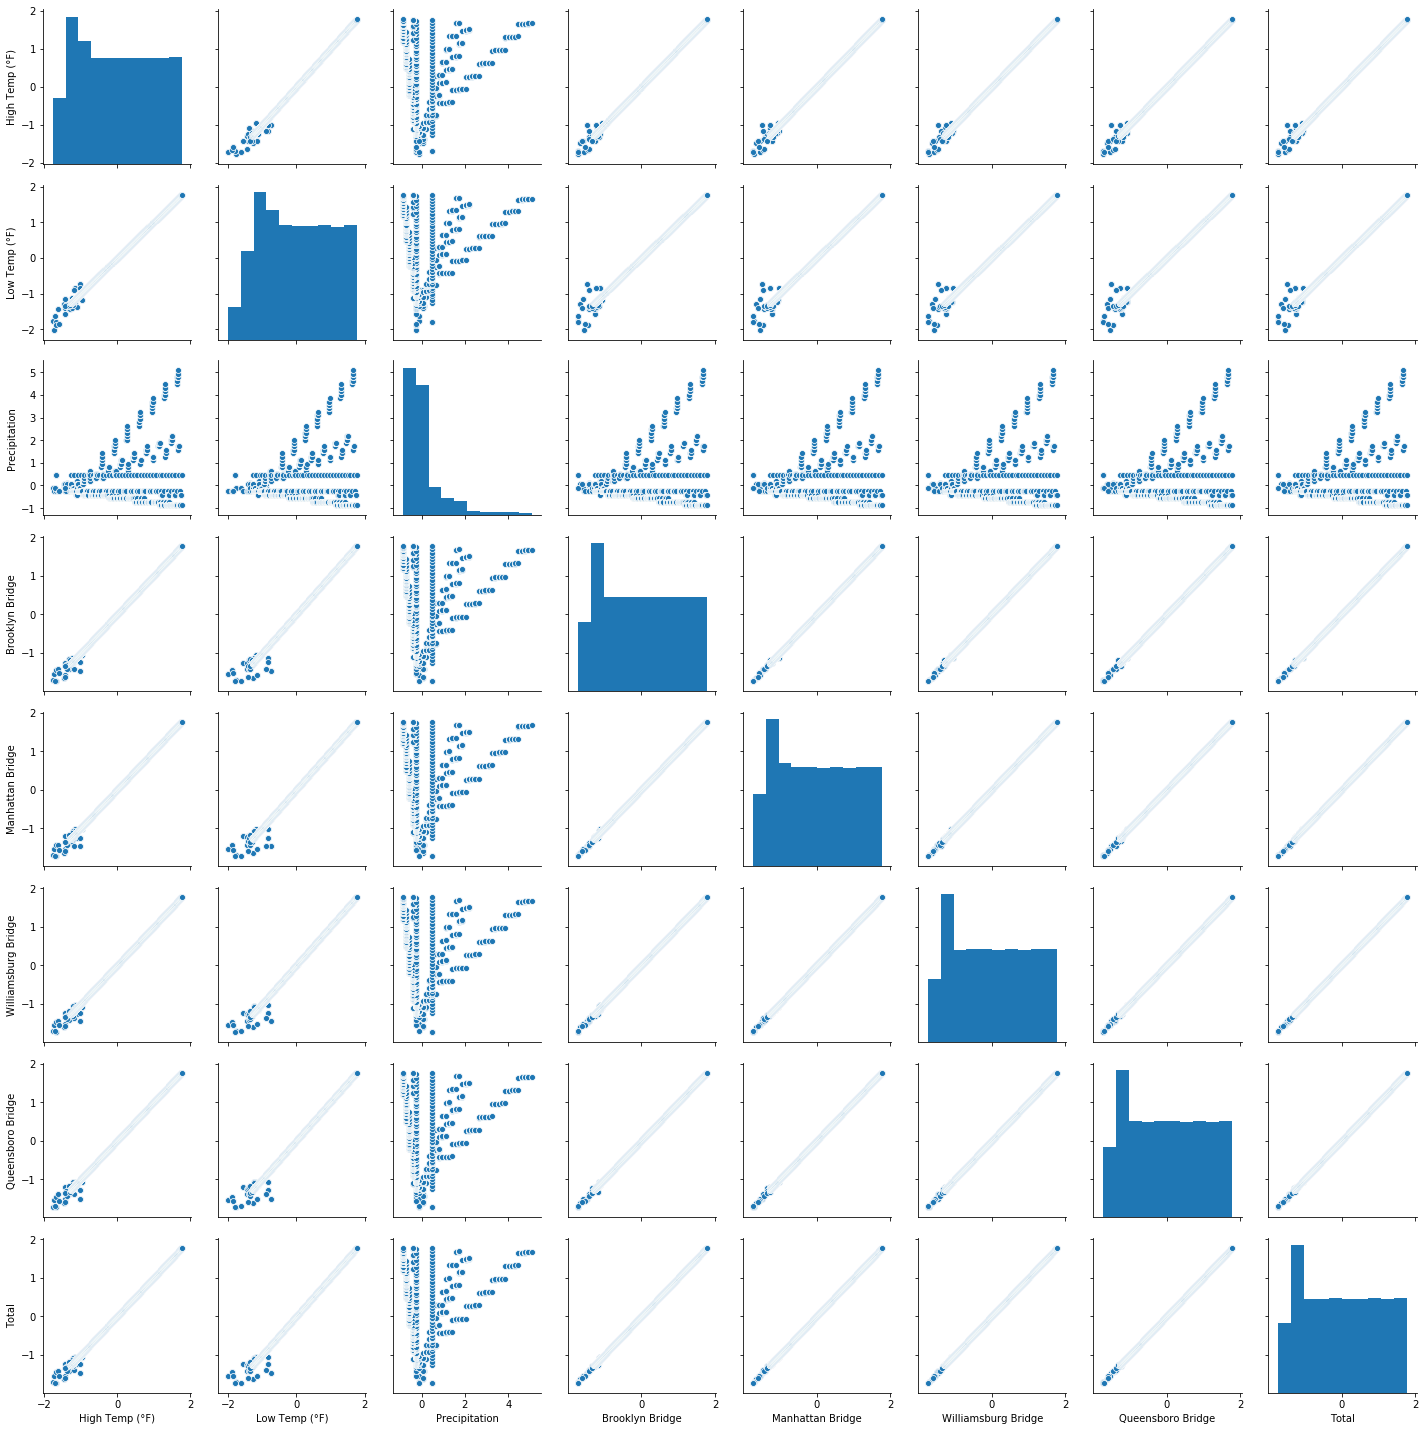

In [283]:
sns.pairplot(df1)
plt.show()